In [1]:
%load_ext autoreload

In [2]:
%autoreload

import sys
sys.path.append('..')

from jax import numpy as jnp
from scipy.integrate import quad

In [3]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib.animation as animation 
from numpy import loadtxt
from diffrax import Kvaerno5, Tsit5
%matplotlib inline

from plot_params import params
#pylab.rcParams.update(params)

cols_default = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [3]:
from linx.background import BackgroundModel
from linx.nuclear import NuclearRates 
from linx.abundances import AbundanceModel
from linx.reactions import Reaction
from linx.thermo import T_g 
from linx.const import mn, mp, eta0, hbar
from scipy.integrate import odeint, solve_ivp, simpson, cumulative_simpson
from linx.pd_rates import decay_model

In [22]:
class Cd():
    def __init__(self):
        self.p = 5
        self.reassign()
    
    def reassign(self):
        self.p = 10
    
    def print_p(self):
        print(self.p)

In [23]:
cd = Cd()
cd.print_p()

10


In [46]:
bkg_model = BackgroundModel()

# Call the class. 
t_vec, a_vec, rho_g_vec, rho_nu_vec, rho_NP_vec, p_NP_vec, Neff_vec = bkg_model(jnp.asarray(0.), T_end = 1e-4)


abd_model = AbundanceModel(
    NuclearRates(nuclear_net='pd_PRIMAT_2023', pd_model=decay_model(60, 1e4, 9e-6))
)

nuclear_rates_q = jnp.zeros(12)

sol = abd_model(
    rho_g_vec, rho_nu_vec, 
    rho_NP_vec, p_NP_vec,
    t_vec=t_vec, a_vec=a_vec, 
    eta_fac = jnp.asarray(1.), 
    tau_n_fac = jnp.asarray(1.), 
    nuclear_rates_q = nuclear_rates_q,
    save_history=True, pd_added = False, T_end = 1e-4
)

abundances = jnp.array([sol.evaluate(t) for t in t_vec])

Compiling abundance model...


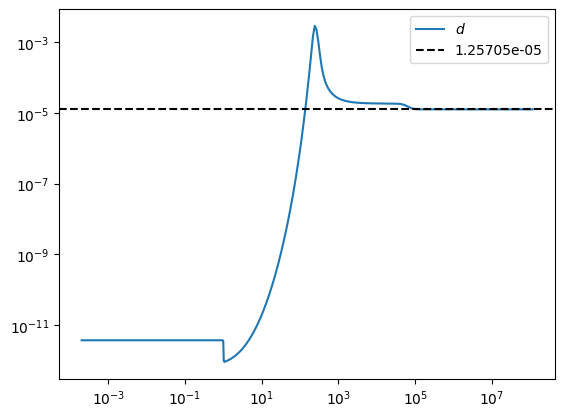

In [66]:
#impose a cutoff for the neutrons
#note he3 is pretty off
el = 2
fig_labels = [r'$n$', r'$p$', r'$d$', r'$t$', r'$^3$He', r'$^4$He', r'$^7$Li', r'$^7$Be']
last_value = jnp.where(jnp.isnan(abundances[:, el]))[0][0]-1
plt.loglog(t_vec, abundances[:, el], label = fig_labels[el])
plt.axhline(abundances[last_value, el], color='k', linestyle='--', label = f"{abundances[last_value, el]:.5e}")
plt.legend()


In [67]:
bkg_model = BackgroundModel()

# Call the class. 
t_vec, a_vec, rho_g_vec, rho_nu_vec, rho_NP_vec, p_NP_vec, Neff_vec = bkg_model(jnp.asarray(0.), T_end = 1e-4)


abd_model = AbundanceModel(
    NuclearRates(nuclear_net='pd_PRIMAT_2023', pd_model=decay_model(60, 1e4, 1e-4))
)

nuclear_rates_q = jnp.zeros(12)

sol = abd_model(
    rho_g_vec, rho_nu_vec, 
    rho_NP_vec, p_NP_vec,
    t_vec=t_vec, a_vec=a_vec, 
    eta_fac = jnp.asarray(1.), 
    tau_n_fac = jnp.asarray(1.), 
    nuclear_rates_q = nuclear_rates_q,
    save_history=True, pd_added = False, T_end = 1e-4
)

abundances = jnp.array([sol.evaluate(t) for t in t_vec])

Compiling abundance model...


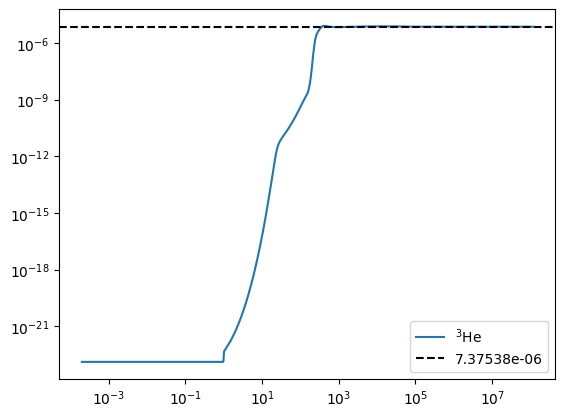

In [69]:
#impose a cutoff for the neutrons
#note he3 is pretty off
el = 4
fig_labels = [r'$n$', r'$p$', r'$d$', r'$t$', r'$^3$He', r'$^4$He', r'$^7$Li', r'$^7$Be']
last_value = jnp.where(jnp.isnan(abundances[:, el]))[0][0]-1
plt.loglog(t_vec, abundances[:, el], label = fig_labels[el])
plt.axhline(abundances[last_value, el], color='k', linestyle='--', label = f"{abundances[last_value, el]:.5e}")
plt.legend()
